In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

Shape of waveform: torch.Size([2, 276858])
Sample rate of waveform: 44100


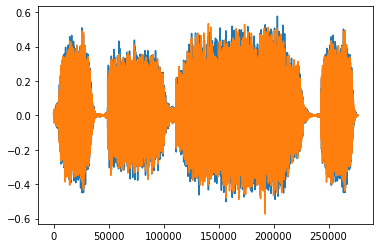

In [2]:
import requests

url = "https://pytorch.org/tutorials//_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
r = requests.get(url)

with open('steam-train-whistle-daniel_simon-converted-from-mp3.wav', 'wb') as f:
    f.write(r.content)

filename = "steam-train-whistle-daniel_simon-converted-from-mp3.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

In [5]:
sample_rate

44100

In [7]:
help(torchaudio.load)

Help on function load in module torchaudio.backend.sox_backend:

load(filepath:str, out:Union[torch.Tensor, NoneType]=None, normalization:bool=True, channels_first:bool=True, num_frames:int=0, offset:int=0, signalinfo:torchaudio.backend.common.SignalInfo=None, encodinginfo:torchaudio.backend.common.EncodingInfo=None, filetype:Union[str, NoneType]=None) -> Tuple[torch.Tensor, int]
    Loads an audio file from disk into a tensor
    
    Args:
        filepath: Path to audio file
    
        out: An optional output tensor to use instead of creating one. (Default: ``None``)
    
        normalization: Optional normalization.
            If boolean `True`, then output is divided by `1 << 31`.
            Assuming the input is signed 32-bit audio, this normalizes to `[-1, 1]`.
            If `float`, then output is divided by that number.
            If `Callable`, then the output is passed as a paramete to the given function,
            then the output is divided by the result. (Default:

Shape of spectrogram: torch.Size([2, 201, 1385])


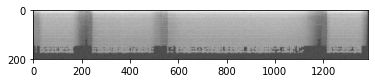

In [8]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

Shape of spectrogram: torch.Size([2, 128, 1385])


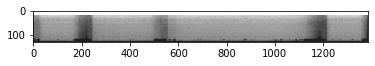

In [11]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

Shape of transformed waveform: torch.Size([1, 27686])


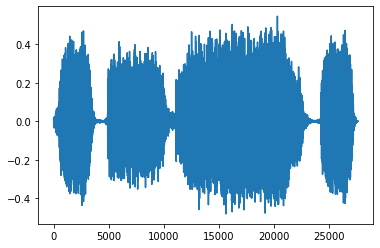

In [10]:
new_sample_rate = sample_rate/10

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())